## Teleporting an Unknown Quantum State via Dual Classical and Einstein-Podolsky-Rosen Channels

Physical Review Letters, vol. 70., 29 March 1993, \#13

"An unknown quantum state can be disassembled into, then later reconstructed from, purely classical information and purely nonclassical Einstein-Podolsky-Rose (EPR) correlations."

In [1]:
import numpy as np
from qutip import Qobj, fock_dm, identity, sigmax, sigmay, sigmaz, bell_state, fock, tensor, basis,\
    ket2dm, Bloch
from qutip.measurement import measurement_statistics, measure

from numpy import linalg as la
import matplotlib.pyplot as plt

In [2]:
# Visual states before and after on the Bloch sphere
def visualize(initial_dm, final_dm):

    # Visualize before and after in the Bloch sphere
    rho = one_particle_dm.data
    az = rho[0,0]-rho[1,1]
    ay = complex(0,1)*(rho[0,1]-rho[1,0])
    ax = rho[0,1]+rho[1,0]
    b=Bloch()
    b.add_points([ax,ay,az])
    b.show()

    rho = initial_dm.data
    az = rho[0,0]-rho[1,1]
    ay = complex(0,1)*(rho[0,1]-rho[1,0])
    ax = rho[0,1]+rho[1,0]
    b=Bloch()
    b.add_points([ax,ay,az])
    b.show()


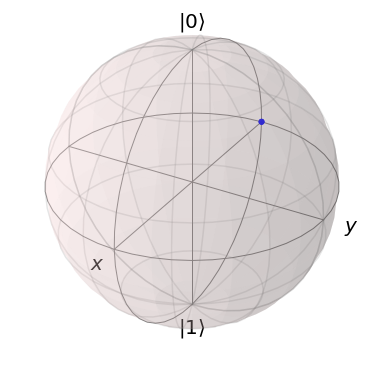

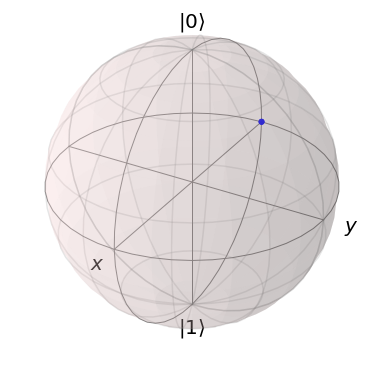

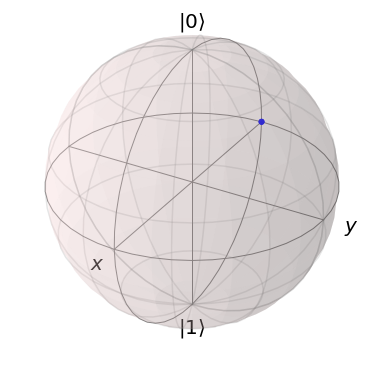

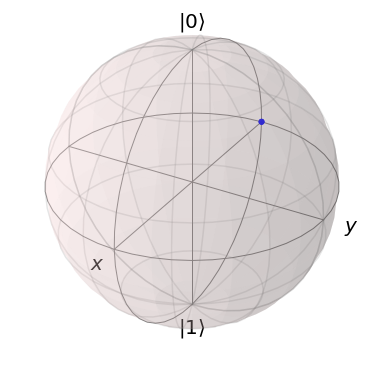

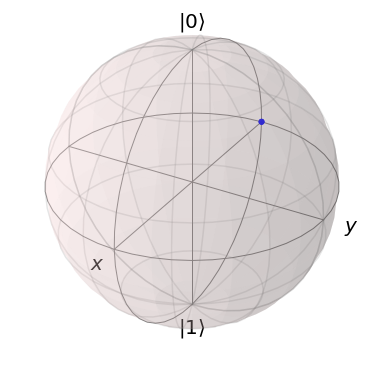

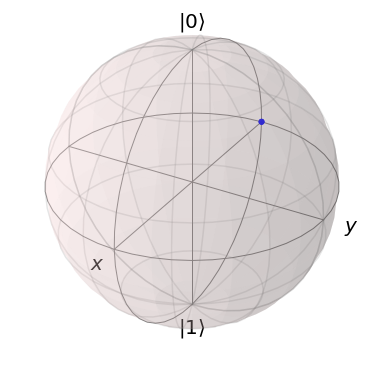

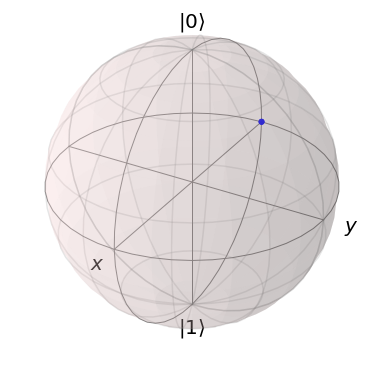

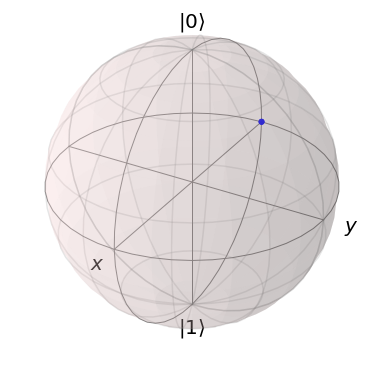

In [3]:
# Pick an initial state
initial_state = (basis(2,0) -basis(2,1))/np.sqrt(2)
# initial_state = basis(2,1)
# dm = density matrix
initial_dm = ket2dm(initial_state)

# Alice entangles qubits 1 and 2
state_01 = tensor(initial_state, basis(2, 0), basis(2, 1))
state_10 = tensor(initial_state, basis(2, 1), basis(2, 0))
state = (state_01 - state_10)/np.sqrt(2)

# Alice measures qubits 0 and 1 in the Bell basis
phi_plus, phi_minus, psi_plus, psi_minus = \
    tensor(ket2dm(bell_state('00')), identity(2)),\
    tensor(ket2dm(bell_state('01')), identity(2)),\
    tensor(ket2dm(bell_state('10')), identity(2)),\
    tensor(ket2dm(bell_state('11')), identity(2))
bell_operators = [phi_plus, phi_minus, psi_plus, psi_minus]
new_states, probs = measurement_statistics(state, bell_operators, [0,1,2])

# Look at all the measurement outcomes
for j, prob in enumerate(probs):
    if prob != 0:

        # Bob receives particle 3; trace over first two qubits
        one_particle_dm = new_states[j].ptrace([2])
        
        # Based on measurement outcome, transform qubit 2
        if j==0: #phi_plus
            gate = sigmay()
        elif j==1:
            gate = sigmax()
        elif j==2:
            gate = sigmaz()
        else:
            gate = None
        if gate is not None:
            one_particle_dm = gate * one_particle_dm * gate.dag()
        visualize(initial_dm, one_particle_dm)

<!-- <img src=“url/filename.gif” alt=“Alt text” title=“Title text” /> -->
<img src="./entanglement-sympy.jpg" width="450"/>

In [4]:
# Pick an initial state
initial_state = (basis(2,0) -basis(2,1))/np.sqrt(2)
initial_dm = ket2dm(initial_state)
# initial_state = basis(2,1)

# entangle qubits 1 and 2, leave 0, 3 and 4 unchanged
# entangle qubits 3 and 4, leave 0,1 and 2 unchanged
entangle = (tensor(basis(2, 0), basis(2, 1)) - tensor(basis(2, 1), basis(2, 0)))/np.sqrt(2)
state = tensor(initial_state, entangle, entangle)

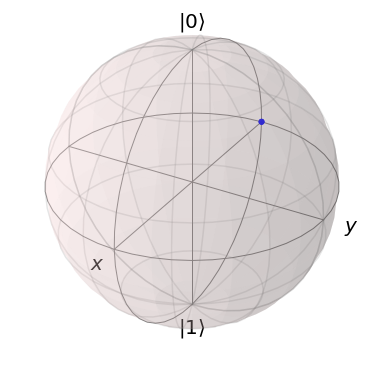

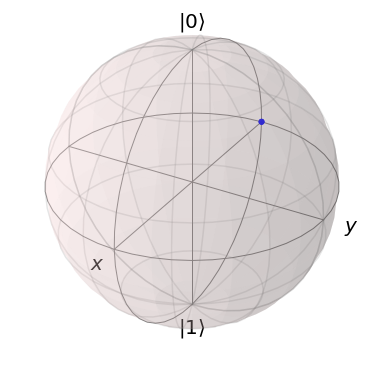

In [5]:
# Measure qubits 2 and 3 in Bell basis
phi_plus, phi_minus, psi_plus, psi_minus = \
    tensor(identity(2), identity(2), ket2dm(bell_state('00')), identity(2)),\
    tensor(identity(2), identity(2), ket2dm(bell_state('01')), identity(2)),\
    tensor(identity(2), identity(2), ket2dm(bell_state('10')), identity(2)),\
    tensor(identity(2), identity(2), ket2dm(bell_state('11')), identity(2))
bell_operators = [phi_plus, phi_minus, psi_plus, psi_minus]
measured_value1, state = measure(state, bell_operators)

# Measure qubits 0 and 1 in Bell basis
phi_plus, phi_minus, psi_plus, psi_minus = \
    tensor(ket2dm(bell_state('00')), identity(2), identity(2), identity(2)),\
    tensor(ket2dm(bell_state('01')), identity(2), identity(2), identity(2)),\
    tensor(ket2dm(bell_state('10')), identity(2), identity(2), identity(2)),\
    tensor(ket2dm(bell_state('11')), identity(2), identity(2), identity(2))
bell_operators = [phi_plus, phi_minus, psi_plus, psi_minus]
measured_value2, state = measure(state, bell_operators)

# Trace over first four qubits
one_particle_dm = state.ptrace([4])

# Depending on the measurement outcome, the receiver applies a gate to the link qubit.
i1 = measured_value1
i2 = measured_value2
if i1 == 0:
    if i2 == 0:
        gate = None
    elif i2 == 1:
        gate = sigmaz()
    elif i2 == 2:
        gate = sigmax()
    else:
        gate = sigmay()
elif i1==1:
    if i2 == 0:
        gate = sigmaz()
    elif i2 == 1:
        gate = None
    elif i2 == 2:
        gate = sigmay()
    else:
        gate = sigmax()

elif i1 == 2:
    if i2 == 0:
        gate = sigmax()
    elif i2 == 1:
        gate = sigmay()
    elif i2 == 2:
        gate = None
    else:
        gate = sigmaz()
elif i1 == 3:
    if i2 == 0:
        gate = sigmay()
    elif i2 == 1:
        gate = sigmax()
    elif i2 == 2:
        gate = sigmaz()
    else:
        gate = None

if gate is not None:
    one_particle_dm = gate * one_particle_dm * gate.dag()
initial_dm = ket2dm(initial_state)
visualize(initial_dm, one_particle_dm)
